# Visualization of inversion - Diorama data

In [8]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf

In [9]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [10]:
mypath = 'tfa_inversion/'

In [11]:
with open(mypath+'inc-71_dec-23_r1000_int12_z0350_dz450/inversion.pickle') as w:
        result = pickle.load(w)
with open(mypath+'inc-71_dec-23_r1000_int12_z0450_dz450/inversion.pickle') as w:
        result_z0p = pickle.load(w)
with open(mypath+'inc-71_dec-23_r1000_int12_z0250_dz450/inversion.pickle') as w:
        result_z0m = pickle.load(w)
with open(mypath+'inc-71_dec-23_r1000_int15_z0350_dz450/inversion.pickle') as w:
        result_intp = pickle.load(w)
with open(mypath+'inc-71_dec-23_r1000_int9_z0350_dz450/inversion.pickle') as w:
        result_intm = pickle.load(w)
with open(mypath+'inc-66_dec-18_r1000_int12_z0350_dz450/inversion.pickle') as w:
        result_dirp = pickle.load(w)
with open(mypath+'inc-76_dec-28_r1000_int12_z0350_dz450/inversion.pickle') as w:
        result_dirm = pickle.load(w)
with open(mypath+'inc-71_dec-23_r1000_int9_z0250_dz450/inversion.pickle') as w:
        result_z0m_intm = pickle.load(w)
with open(mypath+'inc-71_dec-23_r1000_int9_z0450_dz450/inversion.pickle') as w:
        result_z0p_intm = pickle.load(w)
with open(mypath+'inc-71_dec-23_r1000_int15_z0450_dz450/inversion.pickle') as w:
        result_z0p_intp = pickle.load(w)
with open(mypath+'inc-71_dec-23_r1000_int15_z0250_dz450/inversion.pickle') as w:
        result_z0m_intp = pickle.load(w)
with open(mypath+'inc-66_dec-18_r1000_int12_z0450_dz450/inversion.pickle') as w:
        result_z0p_dirp = pickle.load(w)
with open(mypath+'inc-66_dec-18_r1000_int12_z0250_dz450/inversion.pickle') as w:
        result_z0m_dirp = pickle.load(w)
with open(mypath+'inc-76_dec-28_r1000_int12_z0250_dz450/inversion.pickle') as w:
        result_z0m_dirm = pickle.load(w)
with open(mypath+'inc-76_dec-28_r1000_int12_z0450_dz450/inversion.pickle') as w:
        result_z0p_dirm = pickle.load(w)
with open(mypath+'inc-66_dec-18_r1000_int15_z0350_dz450/inversion.pickle') as w:
        result_dirp_intp = pickle.load(w)
with open(mypath+'inc-66_dec-18_r1000_int9_z0350_dz450/inversion.pickle') as w:
        result_dirp_intm = pickle.load(w)
with open(mypath+'inc-76_dec-28_r1000_int9_z0350_dz450/inversion.pickle') as w:
        result_dirm_intm = pickle.load(w)
with open(mypath+'inc-76_dec-28_r1000_int14_z0350_dz450/inversion.pickle') as w:
        result_dirm_intp = pickle.load(w)

In [12]:
r0 = mfun.plot_prisms(result['prisms'])
r1 = mfun.plot_prisms(result_z0p['prisms'])
r2 = mfun.plot_prisms(result_z0m['prisms'])
r3 = mfun.plot_prisms(result_intp['prisms'])
r4 = mfun.plot_prisms(result_intm['prisms'])
r5 = mfun.plot_prisms(result_dirp['prisms'])
r6 = mfun.plot_prisms(result_dirm['prisms'])
r7 = mfun.plot_prisms(result_z0m_intp['prisms'])
r8 = mfun.plot_prisms(result_z0p_intp['prisms'])
r9 = mfun.plot_prisms(result_z0m_intm['prisms'])
r10 = mfun.plot_prisms(result_z0p_intm['prisms'])
r11 = mfun.plot_prisms(result_z0m_dirp['prisms'])
r12 = mfun.plot_prisms(result_z0p_dirp['prisms'])
r13 = mfun.plot_prisms(result_z0m_dirm['prisms'])
r14 = mfun.plot_prisms(result_z0p_dirm['prisms'])
r15 = mfun.plot_prisms(result_dirm_intp['prisms'])
r16 = mfun.plot_prisms(result_dirp_intp['prisms'])
r17 = mfun.plot_prisms(result_dirm_intm['prisms'])
r18 = mfun.plot_prisms(result_dirp_intm['prisms'])

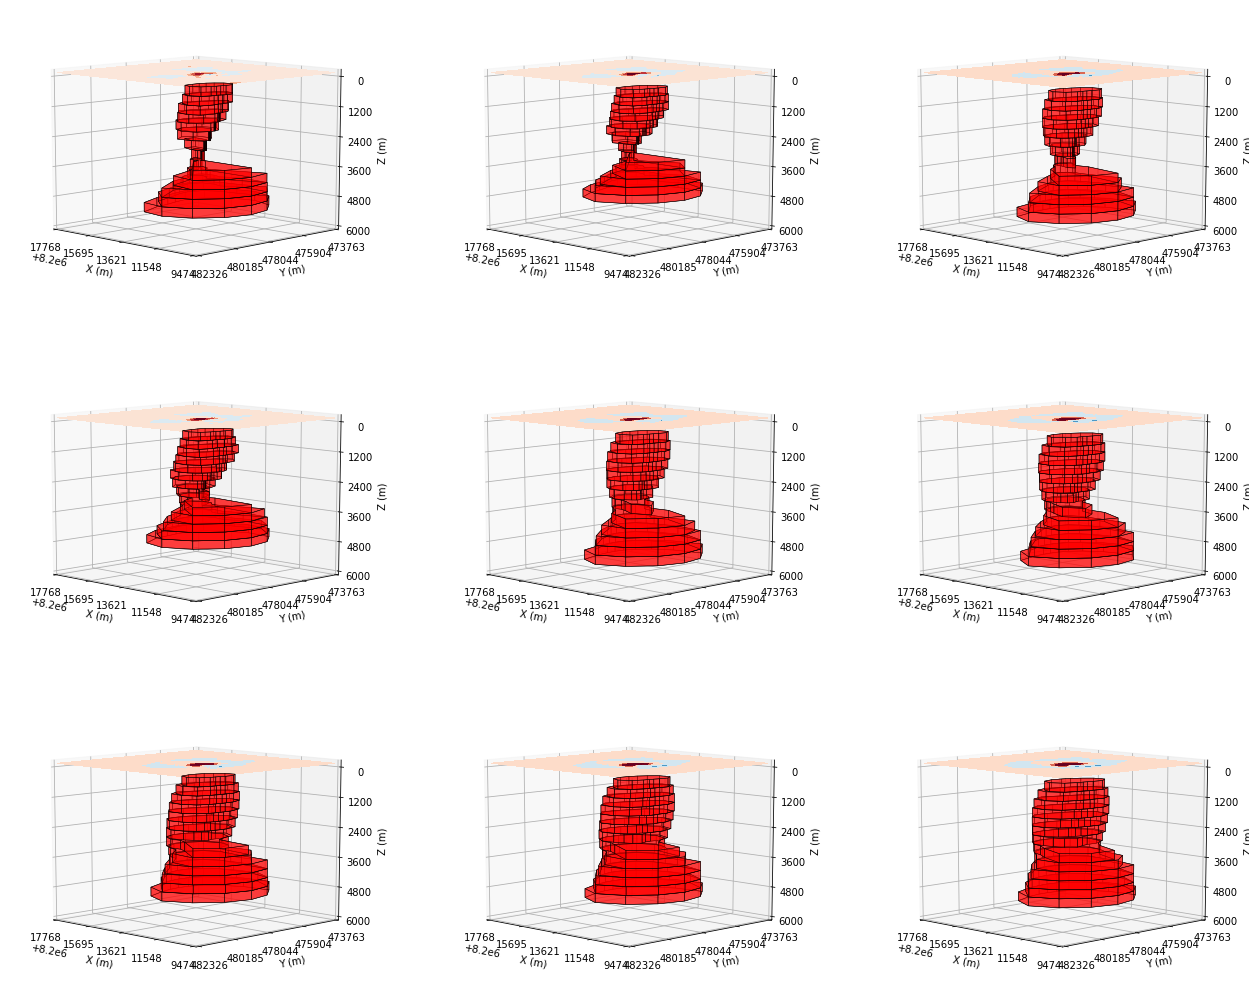

In [54]:
fig = plt.figure(figsize=(22,18))

norm=mpb.colors.Normalize(vmin=np.min(result['residual']), vmax=np.min(result['residual'])*(-1))

#r7
ax = fig.add_subplot(331, projection='3d')
ax.add_collection3d(Poly3DCollection(r7, alpha=0.5, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(np.min(result['xp']), np.max(result['xp']), 100)
ax.set_ylim(np.min(result['yp']), np.max(result['yp']), 100)
ax.set_zlim(6000, -150, 100)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, 135)
ax.set_xticks(np.linspace(np.min(result['xp']), np.max(result['xp']), 5))
ax.set_yticks(np.linspace(np.min(result['yp']), np.max(result['yp']), 5))
ax.set_zticks(np.linspace(6000, 0, 6))

ax.tricontourf(result_z0m_intp['xp'], result_z0m_intp['yp'], result_z0m_intp['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r3
ax = fig.add_subplot(332, projection='3d')
ax.add_collection3d(Poly3DCollection(r3, alpha=0.5, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(np.min(result['xp']), np.max(result['xp']), 100)
ax.set_ylim(np.min(result['yp']), np.max(result['yp']), 100)
ax.set_zlim(6000, -150, 100)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, 135)
ax.set_xticks(np.linspace(np.min(result['xp']), np.max(result['xp']), 5))
ax.set_yticks(np.linspace(np.min(result['yp']), np.max(result['yp']), 5))
ax.set_zticks(np.linspace(6000, 0, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_intp['residual']), vmax=np.min(result_intp['residual'])*(-1))
ax.tricontourf(result_intp['xp'], result_intp['yp'], result_intp['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r8
ax = fig.add_subplot(333, projection='3d')
ax.add_collection3d(Poly3DCollection(r8, alpha=0.5, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(np.min(result['xp']), np.max(result['xp']), 100)
ax.set_ylim(np.min(result['yp']), np.max(result['yp']), 100)
ax.set_zlim(6000, -150, 100)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, 135)
ax.set_xticks(np.linspace(np.min(result['xp']), np.max(result['xp']), 5))
ax.set_yticks(np.linspace(np.min(result['yp']), np.max(result['yp']), 5))
ax.set_zticks(np.linspace(6000, 0, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_z0p_intp['residual']), vmax=np.min(result_z0p_intp['residual'])*(-1))
ax.tricontourf(result_z0p_intp['xp'], result_z0p_intp['yp'], result_z0p_intp['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r2
ax = fig.add_subplot(334, projection='3d')
ax.add_collection3d(Poly3DCollection(r2, alpha=0.5, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(np.min(result['xp']), np.max(result['xp']), 100)
ax.set_ylim(np.min(result['yp']), np.max(result['yp']), 100)
ax.set_zlim(6000, -150, 100)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, 135)
ax.set_xticks(np.linspace(np.min(result['xp']), np.max(result['xp']), 5))
ax.set_yticks(np.linspace(np.min(result['yp']), np.max(result['yp']), 5))
ax.set_zticks(np.linspace(6000, 0, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_z0m['residual']), vmax=np.min(result_z0m['residual'])*(-1))
ax.tricontourf(result_z0m['xp'], result_z0m['yp'], result_z0m['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r1
ax = fig.add_subplot(336, projection='3d')
ax.add_collection3d(Poly3DCollection(r1, alpha=0.5, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(np.min(result['xp']), np.max(result['xp']), 100)
ax.set_ylim(np.min(result['yp']), np.max(result['yp']), 100)
ax.set_zlim(6000, -150, 100)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, 135)
ax.set_xticks(np.linspace(np.min(result['xp']), np.max(result['xp']), 5))
ax.set_yticks(np.linspace(np.min(result['yp']), np.max(result['yp']), 5))
ax.set_zticks(np.linspace(6000, 0, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_z0p['residual']), vmax=np.min(result_z0p['residual'])*(-1))
ax.tricontourf(result_z0p['xp'], result_z0p['yp'], result_z0p['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r0
ax = fig.add_subplot(335, projection='3d')
ax.add_collection3d(Poly3DCollection(r0, alpha=0.5, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(np.min(result['xp']), np.max(result['xp']), 100)
ax.set_ylim(np.min(result['yp']), np.max(result['yp']), 100)
ax.set_zlim(6000, -150, 100)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, 135)
ax.set_xticks(np.linspace(np.min(result['xp']), np.max(result['xp']), 5))
ax.set_yticks(np.linspace(np.min(result['yp']), np.max(result['yp']), 5))
ax.set_zticks(np.linspace(6000, 0, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result['residual']), vmax=np.min(result['residual'])*(-1))
ax.tricontourf(result['xp'], result['yp'], result['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r9
ax = fig.add_subplot(337, projection='3d')
ax.add_collection3d(Poly3DCollection(r9, alpha=0.5, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(np.min(result['xp']), np.max(result['xp']), 100)
ax.set_ylim(np.min(result['yp']), np.max(result['yp']), 100)
ax.set_zlim(6000, -150, 100)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, 135)
ax.set_xticks(np.linspace(np.min(result['xp']), np.max(result['xp']), 5))
ax.set_yticks(np.linspace(np.min(result['yp']), np.max(result['yp']), 5))
ax.set_zticks(np.linspace(6000, 0, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_z0m_intm['residual']), vmax=np.min(result_z0m_intm['residual'])*(-1))
ax.tricontourf(result_z0m_intm['xp'], result_z0m_intm['yp'], result_z0m_intm['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r4
ax = fig.add_subplot(338, projection='3d')
ax.add_collection3d(Poly3DCollection(r4, alpha=0.5, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(np.min(result['xp']), np.max(result['xp']), 100)
ax.set_ylim(np.min(result['yp']), np.max(result['yp']), 100)
ax.set_zlim(6000, -150, 100)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, 135)
ax.set_xticks(np.linspace(np.min(result['xp']), np.max(result['xp']), 5))
ax.set_yticks(np.linspace(np.min(result['yp']), np.max(result['yp']), 5))
ax.set_zticks(np.linspace(6000, 0, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_intm['residual']), vmax=np.min(result_intm['residual'])*(-1))
ax.tricontourf(result_intm['xp'], result_intm['yp'], result_intm['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r10
ax = fig.add_subplot(339, projection='3d')
ax.add_collection3d(Poly3DCollection(r10, alpha=0.5, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(np.min(result['xp']), np.max(result['xp']), 100)
ax.set_ylim(np.min(result['yp']), np.max(result['yp']), 100)
ax.set_zlim(6000, -150, 100)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, 135)
ax.set_xticks(np.linspace(np.min(result['xp']), np.max(result['xp']), 5))
ax.set_yticks(np.linspace(np.min(result['yp']), np.max(result['yp']), 5))
ax.set_zticks(np.linspace(6000, 0, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_z0p_intm['residual']), vmax=np.min(result_z0p_intm['residual'])*(-1))
ax.tricontourf(result_z0p_intm['xp'], result_z0p_intm['yp'], result_z0p_intm['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'diorama_3d_estimates_topxint.png', dpi=300)
plt.show()

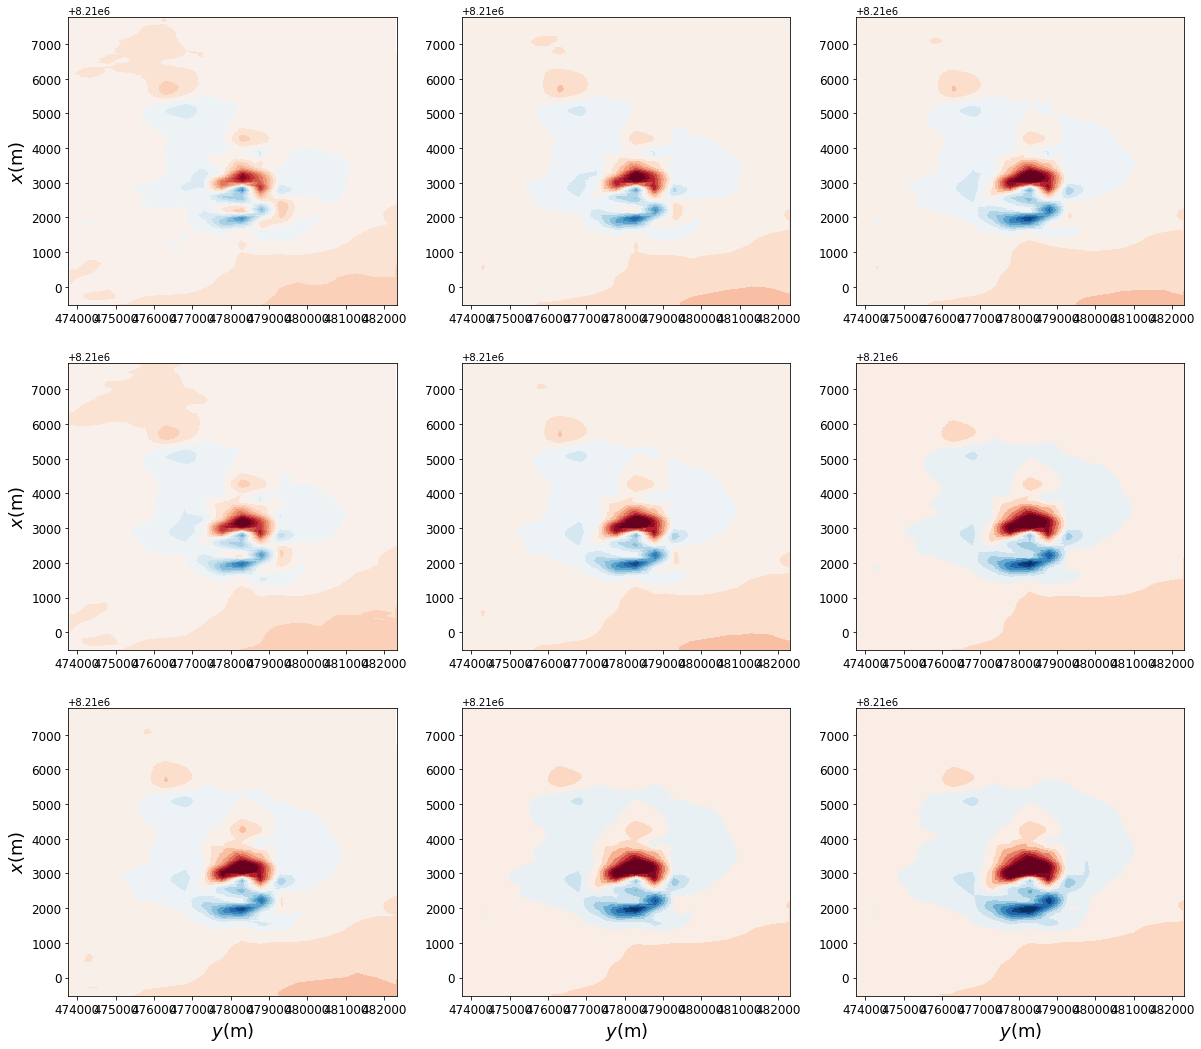

In [51]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(result['residual']), vmax=np.min(result['residual'])*(-1))

plt.subplot(3, 3, 1)
plt.tricontourf(result['yp'], result['xp'], result_z0m_intp['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(result['yp']), np.max(result['yp']))
plt.ylim(np.min(result['xp']), np.max(result['xp']))

plt.subplot(3, 3, 2)
plt.tricontourf(result['yp'], result['xp'], result_intp['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlim(np.min(result['yp']), np.max(result['yp']))
plt.ylim(np.min(result['xp']), np.max(result['xp']))

plt.subplot(3, 3, 3)
plt.tricontourf(result['yp'], result['xp'], result_z0p_intp['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlim(np.min(result['yp']), np.max(result['yp']))
plt.ylim(np.min(result['xp']), np.max(result['xp']))

plt.subplot(3, 3, 4)
plt.tricontourf(result['yp'], result['xp'], result_z0m['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(result['yp']), np.max(result['yp']))
plt.ylim(np.min(result['xp']), np.max(result['xp']))

plt.subplot(3, 3, 5)
plt.tricontourf(result['yp'], result['xp'], result['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlim(np.min(result['yp']), np.max(result['yp']))
plt.ylim(np.min(result['xp']), np.max(result['xp']))

plt.subplot(3, 3, 6)
plt.tricontourf(result['yp'], result['xp'], result_z0p['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlim(np.min(result['yp']), np.max(result['yp']))
plt.ylim(np.min(result['xp']), np.max(result['xp']))

plt.subplot(3, 3, 7)
plt.tricontourf(result['yp'], result['xp'], result_z0m_intm['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(result['yp']), np.max(result['yp']))
plt.ylim(np.min(result['xp']), np.max(result['xp']))

plt.subplot(3, 3, 8)
plt.tricontourf(result['yp'], result['xp'], result_intm['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.xlim(np.min(result['yp']), np.max(result['yp']))
plt.ylim(np.min(result['xp']), np.max(result['xp']))

plt.subplot(3, 3, 9)
im = plt.tricontourf(result['yp'], result['xp'], result_z0p_intm['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.xlim(np.min(result['yp']), np.max(result['yp']))
plt.ylim(np.min(result['xp']), np.max(result['xp']))

plt.savefig(mypath+'diorama_tfa_fitting_topxint.png', dpi=300)
plt.show()

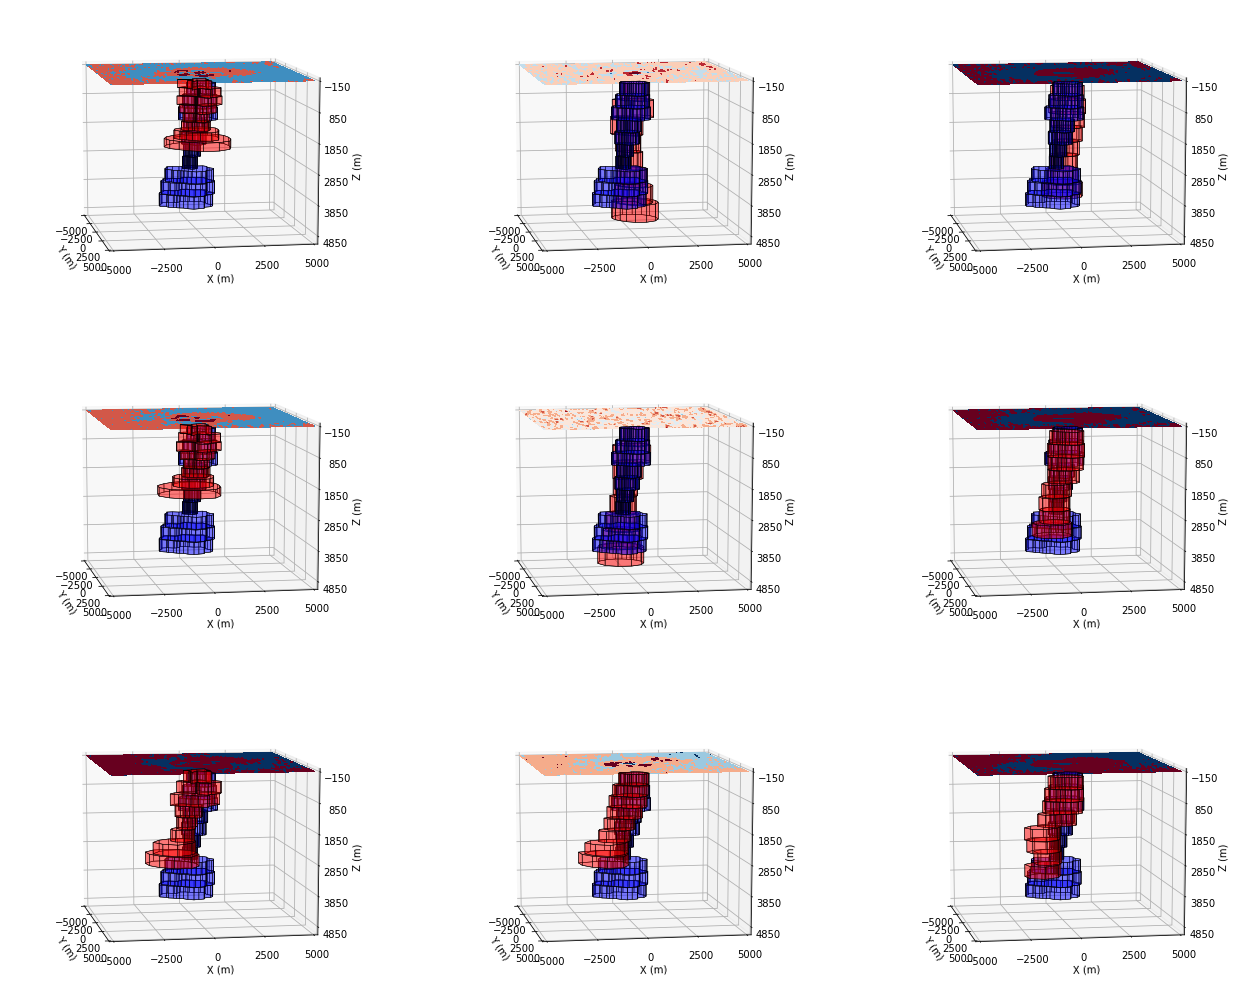

In [25]:
fig = plt.figure(figsize=(22,18))

norm=mpb.colors.Normalize(vmin=np.min(result['residual']), vmax=np.min(result['residual'])*(-1))

#r11
ax = fig.add_subplot(331, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r11, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_z0m_dirp['residual']), vmax=np.min(result_z0m_dirp['residual'])*(-1))
ax.tricontourf(result_z0m_dirp['yp'], result_z0m_dirp['xp'], result_z0m_dirp['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r5
ax = fig.add_subplot(332, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r5, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_dirp['residual']), vmax=np.min(result_dirp['residual'])*(-1))
ax.tricontourf(result_dirp['yp'], result_dirp['xp'], result_dirp['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r12
ax = fig.add_subplot(333, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r12, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_z0p_dirp['residual']), vmax=np.min(result_z0p_dirp['residual'])*(-1))
ax.tricontourf(result_z0p_dirp['yp'], result_z0p_dirp['xp'], result_z0p_dirp['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r2
ax = fig.add_subplot(334, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r2, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_z0m['residual']), vmax=np.min(result_z0m['residual'])*(-1))
ax.tricontourf(result_z0m['yp'], result_z0m['xp'], result_z0m['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r1
ax = fig.add_subplot(336, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r1, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_z0p['residual']), vmax=np.min(result_z0p['residual'])*(-1))
ax.tricontourf(result_z0p['yp'], result_z0p['xp'], result_z0p['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r0
ax = fig.add_subplot(335, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r0, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result['residual']), vmax=np.min(result['residual'])*(-1))
ax.tricontourf(result['yp'], result['xp'], result['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r13
ax = fig.add_subplot(337, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r13, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_z0m_dirm['residual']), vmax=np.min(result_z0m_dirm['residual'])*(-1))
ax.tricontourf(result_z0m_dirm['yp'], result_z0m_dirm['xp'], result_z0m_dirm['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r6
ax = fig.add_subplot(338, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r6, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_dirm['residual']), vmax=np.min(result_dirm['residual'])*(-1))
ax.tricontourf(result_dirm['yp'], result_dirm['xp'], result_dirm['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r14
ax = fig.add_subplot(339, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r14, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_z0p_dirm['residual']), vmax=np.min(result_z0p_dirm['residual'])*(-1))
ax.tricontourf(result_z0p_dirm['yp'], result_z0p_dirm['xp'], result_z0p_dirm['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm, alpha=1)

#plt.savefig(mypath+'diorama_3d_estimate.png', dpi=300)
plt.show()

#img(filename=mypath+'diorama_3d_estimate.png', width=400, height=400)

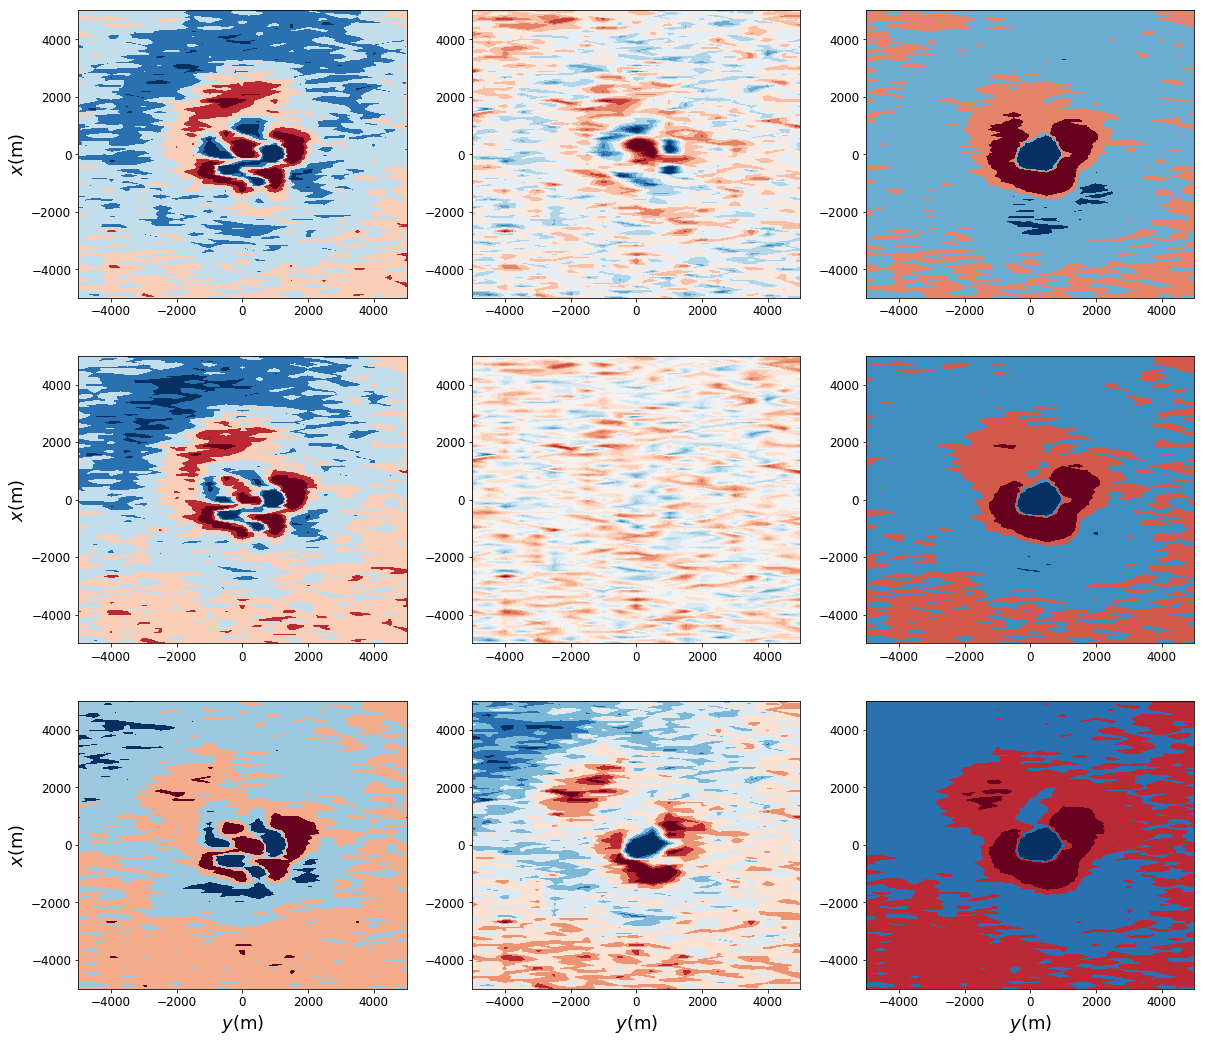

In [26]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(result['residual']), vmax=np.min(result['residual'])*(-1))

plt.subplot(3, 3, 1)
plt.tricontourf(result['yp'], result['xp'], result_z0m_dirp['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 2)
plt.tricontourf(result['yp'], result['xp'], result_dirp['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 3)
plt.tricontourf(result['yp'], result['xp'], result_z0p_dirp['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 4)
plt.tricontourf(result['yp'], result['xp'], result_z0m['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 5)
plt.tricontourf(result['yp'], result['xp'], result['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 6)
plt.tricontourf(result['yp'], result['xp'], result_z0p['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 7)
plt.tricontourf(result['yp'], result['xp'], result_z0m_dirm['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 8)
plt.tricontourf(result['yp'], result['xp'], result_dirm['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 9)
im = plt.tricontourf(result['yp'], result['xp'], result_z0p_dirm['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

#plt.savefig(mypath+'diorama_tfa_fit.png', dpi=300)
plt.show()
#img(filename=mypath+'diorama_tfa_fit.png', width=1600, height=400)

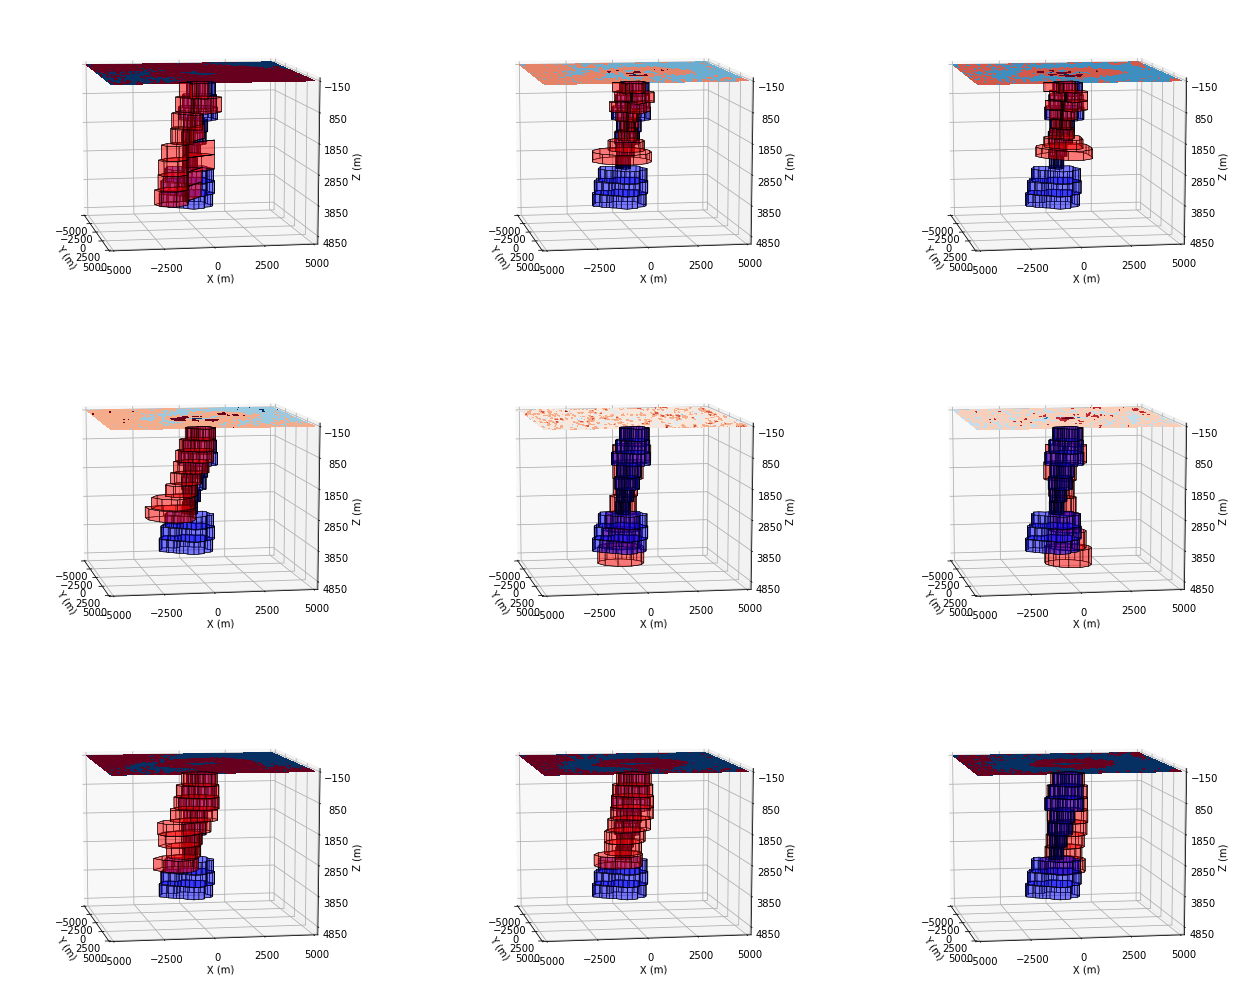

In [27]:
fig = plt.figure(figsize=(22,18))

norm=mpb.colors.Normalize(vmin=np.min(result['residual']), vmax=np.min(result['residual'])*(-1))

#r15
ax = fig.add_subplot(331, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r15, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_dirm_intp['residual']), vmax=np.min(result_dirm_intp['residual'])*(-1))
ax.tricontourf(result_dirm_intp['yp'], result_dirm_intp['xp'], result_dirm_intp['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r5
ax = fig.add_subplot(336, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r5, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_dirp['residual']), vmax=np.min(result_dirp['residual'])*(-1))
ax.tricontourf(result_dirp['yp'], result_dirp['xp'], result_dirp['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r16
ax = fig.add_subplot(333, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r16, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_dirp_intp['residual']), vmax=np.min(result_dirp_intp['residual'])*(-1))
ax.tricontourf(result_dirp_intp['yp'], result_dirp_intp['xp'], result_dirp_intp['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r3
ax = fig.add_subplot(332, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r3, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_intp['residual']), vmax=np.min(result_intp['residual'])*(-1))
ax.tricontourf(result_intp['yp'], result_intp['xp'], result_intp['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r4
ax = fig.add_subplot(338, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r4, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_intm['residual']), vmax=np.min(result_intm['residual'])*(-1))
ax.tricontourf(result_intm['yp'], result_intm['xp'], result_intm['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r0
ax = fig.add_subplot(335, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r0, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result['residual']), vmax=np.min(result['residual'])*(-1))
ax.tricontourf(result['yp'], result['xp'], result['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r17
ax = fig.add_subplot(337, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r17, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_dirm_intm['residual']), vmax=np.min(result_dirm_intm['residual'])*(-1))
ax.tricontourf(result_dirm_intm['yp'], result_dirm_intm['xp'], result_dirm_intm['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r6
ax = fig.add_subplot(334, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r6, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_dirm['residual']), vmax=np.min(result_dirm['residual'])*(-1))
ax.tricontourf(result_dirm['yp'], result_dirm['xp'], result_dirm['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#r18
ax = fig.add_subplot(339, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.3, facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(r18, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(5000, -150, 100)
ax.set_xlabel('Y (m)')
ax.set_ylabel('X (m)')
ax.set_zlabel('Z (m)')
ax.view_init(10, -10)
ax.set_xticks(np.linspace(-5000, 5000, 5))
ax.set_yticks(np.linspace(-5000, 5000, 5))
ax.set_zticks(np.linspace(4850, -150, 6))

#norm=mpb.colors.Normalize(vmin=np.min(result_dirp_intm['residual']), vmax=np.min(result_dirp_intm['residual'])*(-1))
ax.tricontourf(result_dirp_intm['yp'], result_dirp_intm['xp'], result_dirp_intm['residual'],
                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

#plt.savefig(mypath+'diorama_3d_estimate.png', dpi=300)
plt.show()

#img(filename=mypath+'diorama_3d_estimate.png', width=400, height=400)

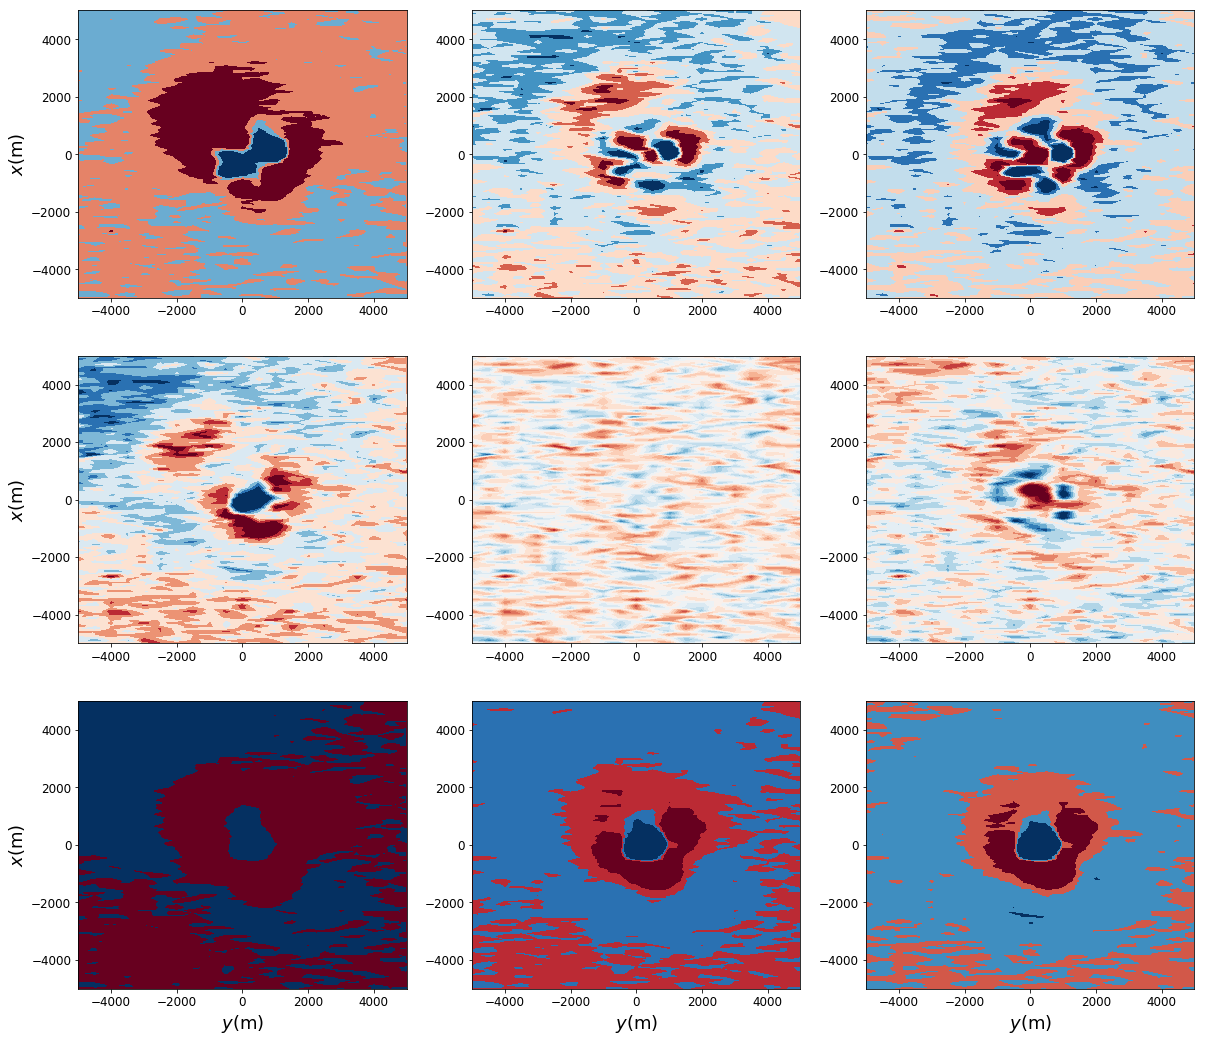

In [28]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(result['residual']), vmax=np.min(result['residual'])*(-1))

plt.subplot(3, 3, 1)
plt.tricontourf(result['yp'], result['xp'], result_dirm_intp['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 2)
plt.tricontourf(result['yp'], result['xp'], result_intp['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 3)
plt.tricontourf(result['yp'], result['xp'], result_dirp_intp['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 4)
plt.tricontourf(result['yp'], result['xp'], result_dirm['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 5)
plt.tricontourf(result['yp'], result['xp'], result['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 6)
plt.tricontourf(result['yp'], result['xp'], result_dirp['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 7)
plt.tricontourf(result['yp'], result['xp'], result_dirm_intm['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 8)
plt.tricontourf(result['yp'], result['xp'], result_intm['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

plt.subplot(3, 3, 9)
im = plt.tricontourf(result['yp'], result['xp'], result_dirp_intm['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.xlim(np.min(result['xp']), np.max(result['xp']))
plt.ylim(np.min(result['yp']), np.max(result['yp']))

#plt.savefig(mypath+'diorama_tfa_fit.png', dpi=300)
plt.show()
#img(filename=mypath+'diorama_tfa_fit.png', width=1600, height=400)